# Rosalind tasks

### Matching Random Motifs

http://rosalind.info/problems/rstr/


#### Background

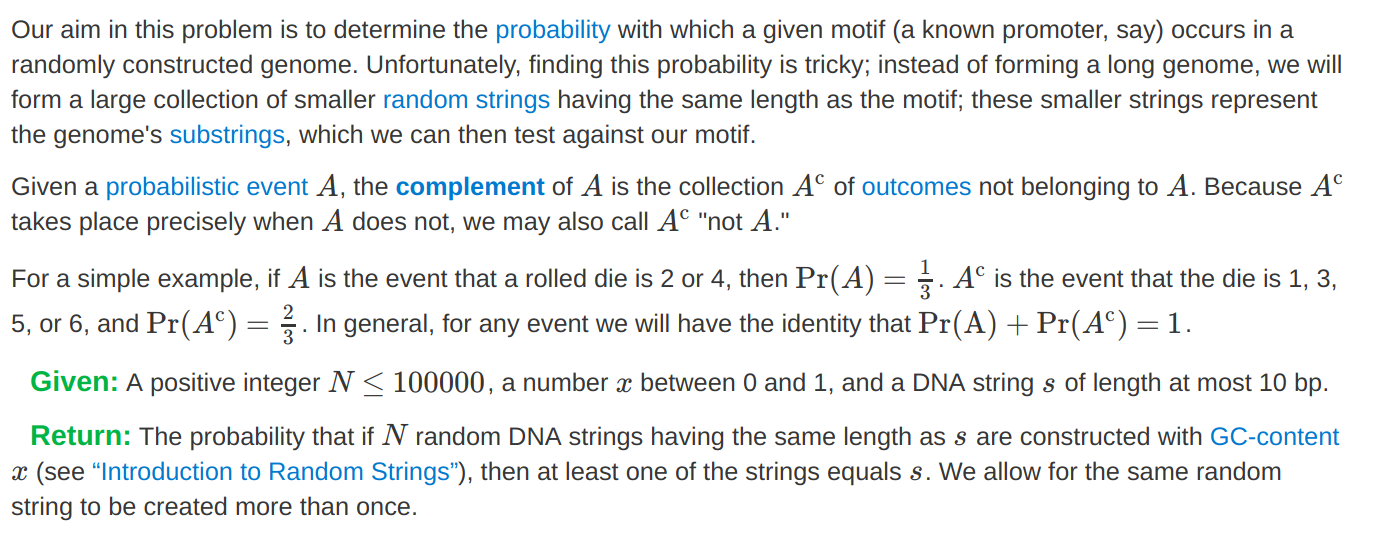

In [1]:
# Given: A positive integer N≤100000, a number x between 0 and 1, 
#        and a DNA string s of length at most 10 bp.


# Let's load the data and assign to variables N, gc_content, 
# and dna_string, here explicitly defined types

with open('/home/manu/Downloads/rosalind_downloads/rosalind_rstr.txt') as data:
    N, gc_content, dna_string = data.read().strip().split()
    N = int(N)
    gc_content = float(gc_content)
    

In [2]:
N = 90000 
gc_content = 0.6
dna_string = 'ATAGCCGA'

N, gc_content, dna_string

(90000, 0.6, 'ATAGCCGA')

In [3]:
# Counts in the number of G/C codons in index 0 and A/T codons in index 1.
codon_count = [0, 0]
for codon in dna_string:
    if codon in ['C', 'G']:
        codon_count[0] += 1
    elif codon in ['A', 'T']:
        codon_count[1] += 1

In [4]:
codon_count

[4, 4]

In [5]:
# The probability the a randomly created dna sequence will with a specific GC content will match the given dna sequence.
dna_prob = ((0.5*gc_content)**codon_count[0])*((0.5*(1-gc_content))**codon_count[1])


In [6]:
dna_prob

1.2960000000000001e-05

**The probability of one or more dna sequences out of N randomly generated sequences with a specific GC content will match the given dna sequence**

*We use probability of the complement. Since this is a **binomial random variable**.*

The main idea is that all of the probabilities sum up to one and so if we know the probability of _something going to happen_ we can subtract that from one to find out the probability of _something not going to happen_.

In [7]:
prob = 1 - (1-dna_prob)**N

# with open('/home/manu/Downloads/rosalind_downloads/rstr_solution.txt', 'w') as output_data:
#    output_data.write(str(prob))

In [8]:
prob

0.6885160784606543

### Inferring Peptide from Spectrum

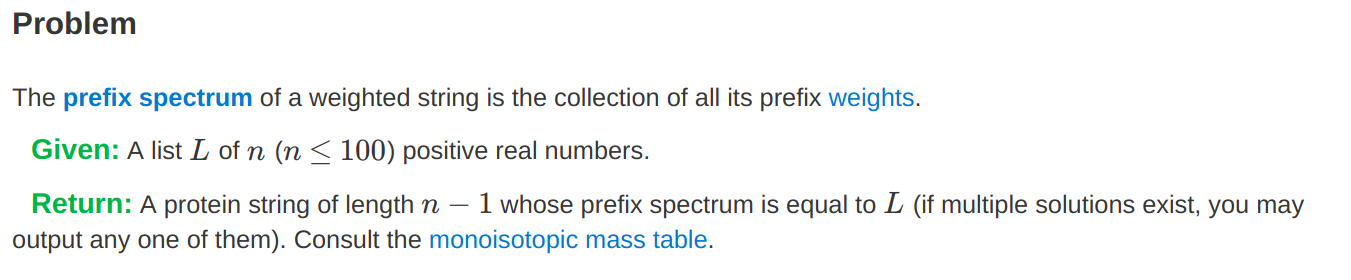

The approach here is that we have two lists of masses. We find the closest values and substitute masses from one list to another. This is like annotation for approximate mass values.

In [9]:
def ProteinWeightDict():
    '''Returns a dictionary that translates Protein to Monoisotopic Mass.'''
    table =  '''A   71.03711
                C   103.00919
                D   115.02694
                E   129.04259
                F   147.06841
                G   57.02146
                H   137.05891
                I   113.08406
                K   128.09496
                L   113.08406
                M   131.04049
                N   114.04293
                P   97.05276
                Q   128.05858
                R   156.10111
                S   87.03203
                T   101.04768
                V   99.06841
                W   186.07931
                Y   163.06333''' 

    protein_weight_dict = dict()

    for protein in table.split('\n'):
        protein_weight_dict[protein.strip('\t').split()[0]] = float(protein.strip('\t').split()[1])

    return protein_weight_dict

In [11]:
ProteinWeightDict()

{'A': 71.03711,
 'C': 103.00919,
 'D': 115.02694,
 'E': 129.04259,
 'F': 147.06841,
 'G': 57.02146,
 'H': 137.05891,
 'I': 113.08406,
 'K': 128.09496,
 'L': 113.08406,
 'M': 131.04049,
 'N': 114.04293,
 'P': 97.05276,
 'Q': 128.05858,
 'R': 156.10111,
 'S': 87.03203,
 'T': 101.04768,
 'V': 99.06841,
 'W': 186.07931,
 'Y': 163.06333}

In [12]:
with open('/home/manu/Downloads/rosalind_downloads/rosalind_spec.txt') as input_data:
    masses = [float(line.strip()) for line in input_data.readlines()]


In [13]:
def closest_amino(weight):
    """Finds closest amino acid based on weight."""
    return min(ProteinWeightDict().items(), key=lambda x: abs(x[1] - weight))[0]


def pref_spec(prefix_weights):
    diffs = [i - j for j, i in zip(prefix_weights, prefix_weights[1:])]
    return "".join([closest_amino(w) for w in diffs])

In [14]:
pref_spec(masses)

'WMQS'

In [15]:
with open('/home/manu/Downloads/rosalind_downloads/spec_sol.txt', 'w') as output_data:
    output_data.write(pref_spec(masses))

### Inferring Peptide from Full Spectrum

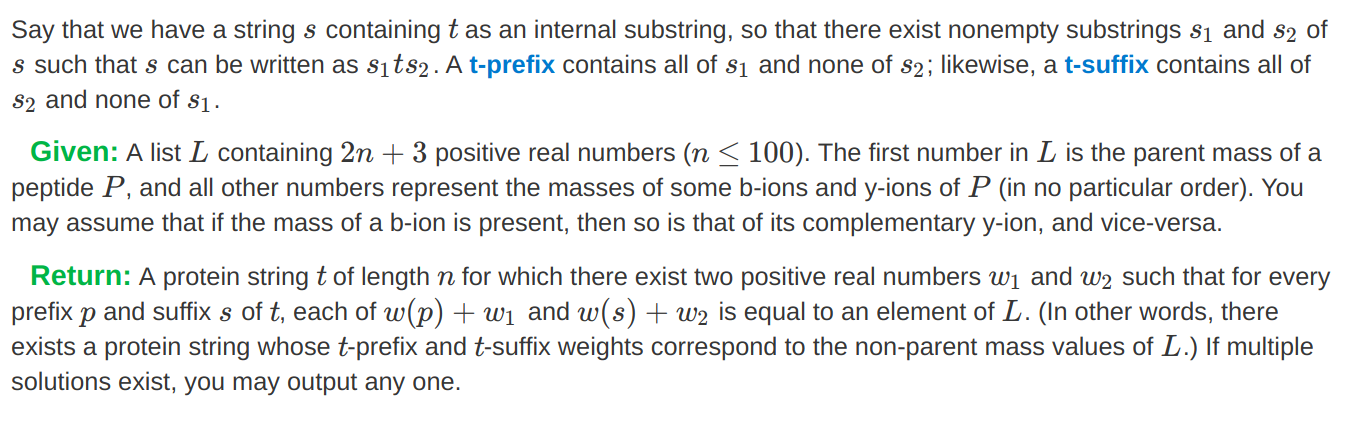

In [29]:
def find_weight_match(current_w, w_list):
    for weight in w_list:
        for item in ProteinWeightDict().items():
            if abs(item[1] - (weight - current)) < 0.01:
                return item[0]
    return -1

In [30]:
with open('/home/manu/Downloads/rosalind_downloads/rosalind_full_spec.txt') as input_data:
        weights = [float(line.strip()) for line in input_data.readlines()]

In [31]:
# Given that len(weights) = 2n+3
n = (len(weights)-3)/2

# Initialize Variables
protein = ''
current = weights[1]
myw = [w for w in weights[2:]]

In [32]:
# Iteratively build the protein.
while len(protein) < n:
    temp = find_weight_match(current, myw)
    if temp == -1:
        break
    else:
        protein += temp
        current += ProteinWeightDict()[temp]
        myw = filter(lambda w: w-current > 0, myw)

In [33]:
with open('/home/manu/Downloads/rosalind_downloads/full_spec_sol.txt', 'w') as output_data:
    output_data.write(protein)

In [34]:
protein

'KEKEP'